In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
# for Jupyter Notebook means to show plots inline instead of in a new window

In [2]:
df = pd.read_csv('Classified Data.csv', index_col=0) # index_col=0 means to use the first column as the index
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [6]:
len(df.columns)

11

- Para o modelo do KNN precisamos de normalizar os dados, pois se não o modelo vai se basear apenas nos dados que são maiores
- Para encontrar os métodos de padronização:

In [7]:
from sklearn.preprocessing import StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance

In [9]:
scaler = StandardScaler()
# starting a instance of StandardScaler

- precisamos de treinar esse modelo para fazer padronizações futuras
- para isso, vamos fitar apenas as colunas que queremos padronizar, deixando a coluna que é o nosso target

In [10]:
scaler.fit(df.drop('TARGET CLASS', axis=1))
# fit method computes the mean and std to be used for later scaling
# drop method removes the 'TARGET CLASS' column from the DataFrame in the axis=1 (columns)

StandardScaler()

In [11]:
df_normalizado = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_normalizado

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]], shape=(1000, 10))

In [13]:
df_param = pd.DataFrame(df_normalizado, columns=df.columns[:-1])
# this creates a new DataFrame with the normalized data and the same column names as the original DataFrame, excluding the last column ('TARGET CLASS')
# we do this because we want to keep the target variable separate from the features
# and use the normalized features for clustering

In [14]:
df_param.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


- agora vamos criar os dados de treino e teste, após normalizá-los

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier is a class from the sklearn library that implements the k-nearest neighbors algorithm for classification tasks

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
# n_neighbors=1 means to use the nearest neighbor for classification

In [ ]:
# "Fitting" a model means training the model on a given dataset so that it learns the relationship between the input features (independent variables) and the target variable (dependent variable).
# During the fitting process, the model adjusts its internal parameters (e.g., weights in linear regression or decision boundaries in KNN) to minimize the error between the predicted and actual values.
# In practice, this is done by calling the `fit()` method on the model object and passing the training data (features and target) as arguments.
# For example, in scikit-learn:
# `model.fit(X_train, y_train)` trains the model using the training data `X_train` (features) and `y_train` (target).

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
# importing metrics for evaluating the performance of the model

In [ ]:
print(classification_report(y_test, pred))
# we can change the neighbors number to see how the model performs

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [23]:
print(confusion_matrix(y_test, pred))

[[134   8]
 [ 11 147]]


In [24]:
erro_rate = []

# itering the number of neighbors from 1 to 40 to test the error in each
for i in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    erro_rate.append(np.mean(pred_i != y_test)) # calculating the error rate by comparing the predicted values with the actual values


Text(0, 0.5, 'Error Rate')

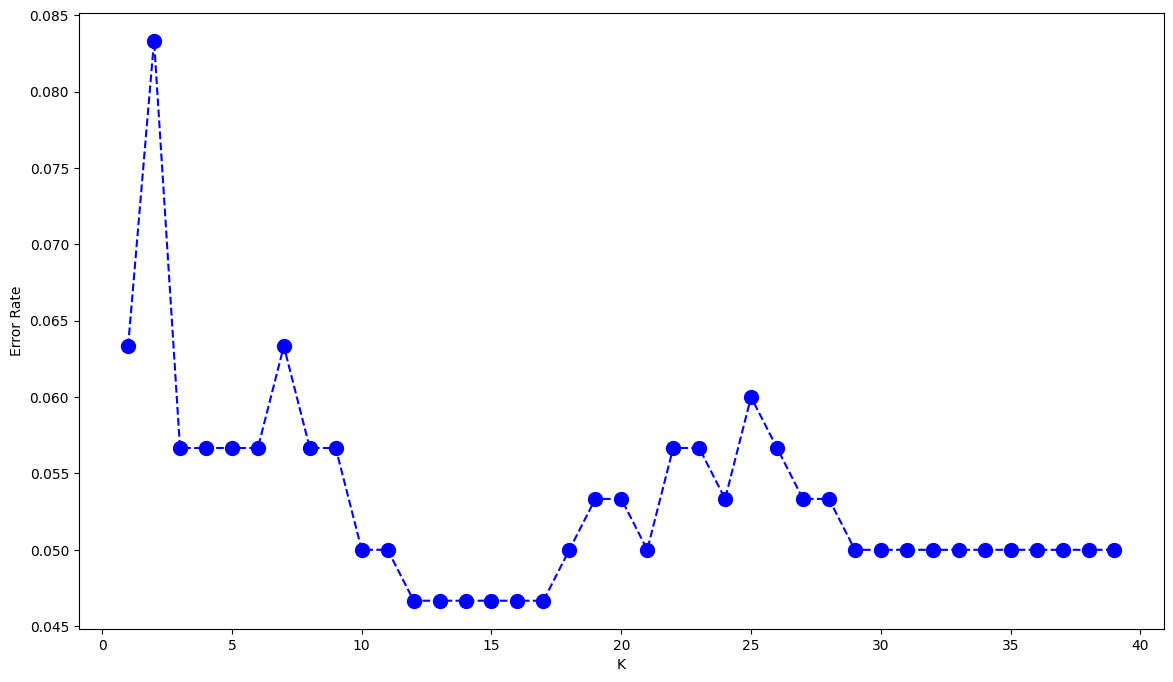

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), erro_rate, color='blue', linestyle='dashed', marker='o', markersize=10)
# plot(axis, x, y, color, linestyle, marker, markersize)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

